# Boosting

Boosting is an ensemble approach(meaning it involves several trees) that starts from a weaker decision and keeps on building the models such that the final prediction is the weighted sum of all the weaker decision-makers. The weights are assigned based on the performance of an individual tree.

Training Sample

Weighted Sample

Weighted Sampie

Weighted Sample

Ist weak classifier

2nd weak classifier

3rd weak classifier

↓

M-th weak ciassifier

2235

Final Classifier

Ensemble parameters are calculated in stagewise way which means that while calculating the subsequent weight, the learning from the previous tree IS considered as well.

# Weak classifier - why tree?



First what is a weak classifier? Weak classifier - slightly better than random guessing.

Any algorithm could have been used as a base for the boosting technique, but the reason for choosing trees are:

# Pro's

computational scalability,

handles missing values,

robust to outliers,

does not require feature scaling,

can deal with irrelevant inputs,

interpretable (if small),

handles mixed predictors as well (quantitive and qualitative)

# Con's

inability to extract a linear combination of features

high variance leading to a small computational power

And that's where boosting comes into the picture. It minimises the variance by taking into consideration the results from various trees.

# Ada Boost (Adaptive Boosting)

Example

For understanding this algorithm, we'll use the following simple dataset for heart patient prediction.



There are a total of 8 rows in our dataset. Hence, we'll initialize the sample weights(w=) as 1/8 in the beginning. And, at the beginning, all the samples are equally important.

In [1]:
import pandas as pd
heart_data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/heart_disease.csv')
heart_data

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


We'll consider the individual coiumns to creas weak decision-makers as shown below and then try to figure out what are the correct and incorrect predictions based on that column

172 NO

1/8

1/8

1/8

Heart Patient

Correct-3

Incorrect-2

Chest Pain Present

Not a Heart Patient Correct-2

Incorrect-1

Are any anenes blocked

123 (autosaved)

Python 3 (lpykernel) O

Data Tramed Educati

Pun

Heart Patient Correct-3

Incorrect-3

Not a Heart Patient Correct-1

Incorrect-1

body weight> 176

Heart Patient

Logout

Not a Heart Patient Correct-4

Correct-3

Incorrect-0

Incorrect-1

We'll now calculate the Gini index of the individual stumps using the formula

G=(weightofthedecision) (1-(p²+(1-p)²))

G.I for chest pain tree= 0.47

G.I for blocked arteries trees 0.5

G.I for body-weight tree 0.2

And, we select the tree with the lowest Gini Index, This will be the first decision-maker for our model.

• Now, we'll calculate the contribution of this tree(stump) to our final decision using the formula:

Contribution (log(1-totalerror)/totalerror)

As this stump classified only one data incorrectly out of the 8, hence the total error is 1/8.

Putting this into the formula we get contribution-0.97

We'll now calculate the new weights using the formula.

1 Increase the sampie weight for incorrectly classified datapoints New weight= old weighte^ contribution= 1/8 0^0.97-0.33

2 Decrease the sample weight for correctly classified datapoints New weight old weighte^- contribution 1/8 e*-0.97=0.05

Populate the new weights as shown below:

Normalize the sample weights. If we add all the new sample weights, we get 0.68. Hence, for normalization we divide all the sample weights by 0.68 and then create normalized sample weights as shown below:

T Is Chest Pain Present Are any arteries blocked Weight of the person Is Heart Patient Sample Weight New Sample Weight Normalized weights



These new normalized weights will act as the sample weights for the next iteration.

Then we create new trees which consider the dataset which was prepared using the new sample weights.

Suppose, m trees(stumps) are classifying a person as a heart patient and in trees(stumps) are classifying a person as a healthy one, then the contribution of mand n trees are added separately and whichever has the higher value, the person is classified as that

For example, if the contribution of m trees is 1.2 and the contribution of n trees is 0.5 then the final result will go in the favour of m trees and the person will be classified as a heart patient.

# python implementation

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# initializing the dataframe
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')
# see the dataset
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk-0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

Each record in the database describes a Boston suburb or town.

In [4]:
# anu missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
# dataset analysis/stats using describe method
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#finding out the correlation between the features
corr=data.corr()
corr.shape

(14, 14)

In [7]:
corr


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


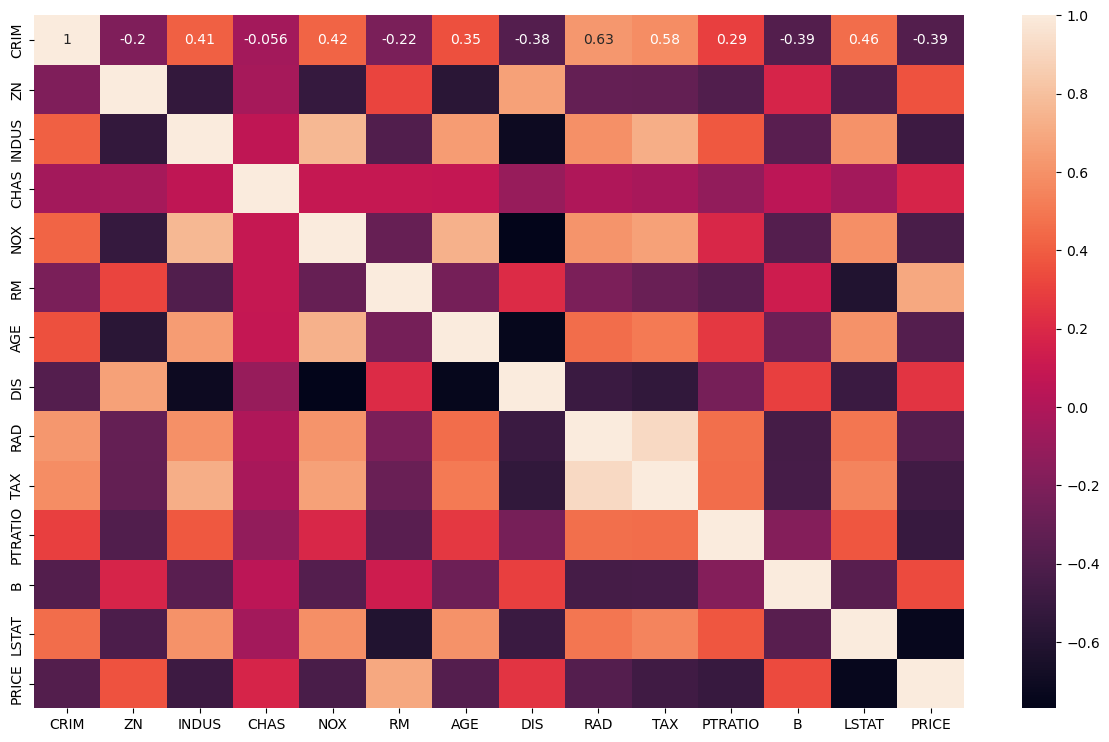

In [11]:
# ploting the heatmap of correlation between features
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,)
plt.show()

# seems RAD and TAX are correlated .lets check with scatter plot

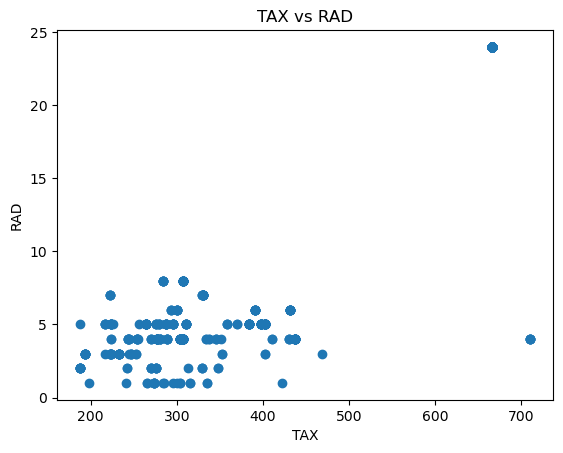

In [12]:
plt.scatter(data.TAX,data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()

In [13]:
# dividing feature and label data
X=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']

In [14]:
# train teat split (hold out method)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

# AdaBoost model training


In [16]:
from sklearn.ensemble import AdaBoostRegressor

In [17]:
ada=AdaBoostRegressor()

In [18]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [19]:
# model prediction on train data
y_pred=ada.predict(X_train)

In [20]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
459,6.80117,0.0,18.10,0,0.7130,6.081,84.4,2.7175,24,666,20.2,396.90,14.70
46,0.18836,0.0,6.91,0,0.4480,5.786,33.3,5.1004,3,233,17.9,396.90,14.15
50,0.08873,21.0,5.64,0,0.4390,5.963,45.7,6.8147,4,243,16.8,395.56,13.45
308,0.49298,0.0,9.90,0,0.5440,6.635,82.5,3.3175,4,304,18.4,396.90,4.54
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0,0.4840,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
359,4.26131,0.0,18.10,0,0.7700,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
323,0.28392,0.0,7.38,0,0.4930,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
280,0.03578,20.0,3.33,0,0.4429,7.820,64.5,4.6947,5,216,14.9,387.31,3.76


In [21]:
y_pred[:6]

array([18.56451613, 21.7       , 21.8       , 26.3146789 , 21.1379562 ,
       25.50941704])

In [22]:
accuracy=metrics.r2_score(y_train,y_pred)
print('R square score',accuracy)

R square score 0.906155974118426


# since model has already seen the data so it is producing better score

In [23]:
# predicting test data with the model
y_test_pred=ada.predict(X_test)

In [24]:
# model evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R square score:',accuracy)

R square score: 0.8303868753704686


# hyperparameter tuning using RandimizedSearchCV

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.09,0.25,0.30]}

In [28]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [29]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.09, 0.25, 0.3],
                                        'n_estimators': [47, 50, 60, 70]})

In [30]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=60)

In [31]:
ada=AdaBoostRegressor(learning_rate=0.35,n_estimators=47)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print('****accuracy post tuning*********')

print(metrics.r2_score(y_test,y_pred))

****accuracy post tuning*********
0.8423820576008958
